In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
create tsble if not exists sales (
    id integer primary key autoincrement,
    product text,
    quantity integer,
    price real
)
""")

In [2]:
# Insert dummy data
sample_data = [
    ("Laptop", 5, 60000),
    ("Laptop", 3, 60000),
    ("Phone", 10, 20000),
    ("Phone", 7, 20000),
    ("Tablet", 4, 30000),
    ("Tablet", 6, 30000),
    ("Headphones", 15, 2000),
    ("Headphones", 20, 2000),
]

cursor.executemany("insert into sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [3]:
query = """
select 
    product, 
    sum(quantity) as total_qty, 
    sum(quantity * price) as revenue
from sales
group by product
"""
df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Headphones,35,70000.0
1,Laptop,8,480000.0
2,Phone,17,340000.0
3,Tablet,10,300000.0


<Figure size 800x500 with 0 Axes>

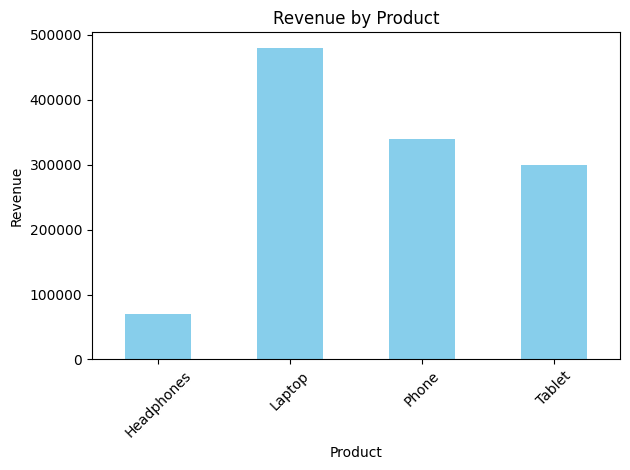

In [4]:
plt.figure(figsize=(8, 5))
df.plot(kind="bar", x="product", y="revenue", legend=False, color="skyblue")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
conn.close()